Copyright by Arjun Sarkar Research Group Applied Systems Biology - Head: Prof. Dr. Marc Thilo Figge https://www.leibniz-hki.de/en/applied-systems-biology.html HKI-Center for Systems Biology of Infection Leibniz Institute for Natural Product Research and Infection Biology - Hans Knöll Insitute (HKI) Adolf-Reichwein-Straße 23, 07745 Jena, Germany

In [1]:
import os
import glob
import numpy as np

from matplotlib import pyplot as plt
import tifffile as tif
import cv2 as cv
from patchify import patchify
import pandas as pd
from PIL import Image

In [2]:
path_images = '/asbdata/Arjun/Bloodi/TIFF8_preprocessed/'

df = pd.read_csv('Labels.csv')
df.head()

,Video_Num,Infection_type,Patient
0,1,ca,1
1,2,cg,1
2,3,mock,1
3,4,ca,2
4,5,cg,2


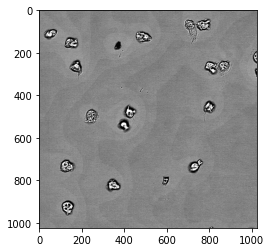

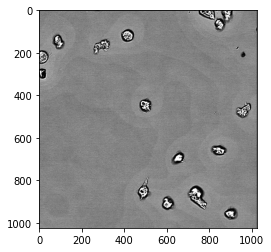

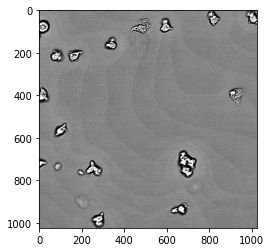

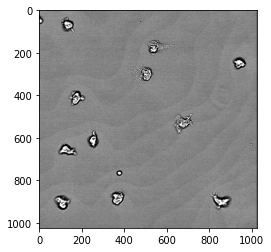

In [3]:
image = cv.imread('/asbdata/Arjun/Bloodi/TIFF8_preprocessed/1/005.tif',0)

#create patches - test
# create 9 patches from one image
patches = patchify(image, (1024,1024), step = 1024)  #Step=512 pixel overlap

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        
        single_patch = patches[i,j,:,:]
        
        plt.imshow(single_patch,cmap='gray')
        plt.show()

In [4]:
# create the required folders to save the patches

if not os.path.exists('/asbdata/Arjun/Bloodi/Patches'):
    
    try:
        
        os.mkdir('/asbdata/Arjun/Bloodi/Patches')
        for i,item in df.iterrows():
            os.mkdir(f'/asbdata/Arjun/Bloodi/Patches/{item[0]}')
        
    except OSError:
        
        print('Creation of directory failed')
        
    else:
        
        print('Successfully created directory')
        
else:
    
    print('Directory already exists')

Successfully created directory


In [5]:
list_files = []

def store_images(image, image_name, patch_number, Video_num, infection, patient):
    
    # using PIL to save the patches in the respective folders
    
    image_name = image_name[:-4]
    filename = image_name + '_' + patch_number + '.tif'
        
    im = Image.fromarray(image)
    im.save(f'/asbdata/Arjun/Bloodi/Patches/{Video_num}/{filename}')
    
    # store image details in list
    # required later for creating dataframe
    
    list_files.append([Video_num, image_name, filename, infection, patient])
        
def create_patches(image, image_name, Video_num, infection, patient):
    
    # function to create 4 patches per image
    
    patches = patchify(image, (1024,1024), step = 1024)

    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
        
            single_patch = patches[i,j,:,:]
            
            patch_number = f'{i}_{j}'
            
            image_storage = store_images(single_patch, image_name, patch_number, Video_num, infection, patient)

In [6]:
# create all the patches

for i,item in df.iterrows():
    
    Video_num = str(item[0])
    infection = str(item[1])
    patient = str(item[2])
    
    image_list = os.listdir(path_images + '/' + Video_num)
    
    for images in image_list:
        
        image_name = images
        
        image = cv.imread(path_images + '/' + Video_num + '/' + images,0)
        create_patches(image, image_name, Video_num, infection, patient)
        
    print(f'Completed for video {item[0]}')

Completed for video 1
Completed for video 2
Completed for video 3
Completed for video 4
Completed for video 5
Completed for video 6
Completed for video 13
Completed for video 14
Completed for video 15
Completed for video 18
Completed for video 19
Completed for video 20
Completed for video 21
Completed for video 22
Completed for video 23
Completed for video 24
Completed for video 25
Completed for video 26
Completed for video 27
Completed for video 28
Completed for video 29
Completed for video 30
Completed for video 31
Completed for video 32
Completed for video 33
Completed for video 34
Completed for video 35


In [7]:
# create the dataframe with information on patches

df_patches = pd.DataFrame(list_files, columns =['video_num','filename','patch_name','infection','patient'])
df_patches

,video_num,filename,patch_name,infection,patient
0,1,246,246_0_0.tif,ca,1
1,1,246,246_0_1.tif,ca,1
2,1,246,246_1_0.tif,ca,1
3,1,246,246_1_1.tif,ca,1
4,1,094,094_0_0.tif,ca,1
...,...,...,...,...,...
28075,35,250,250_1_1.tif,mock,12
28076,35,227,227_0_0.tif,mock,12
28077,35,227,227_0_1.tif,mock,12
28078,35,227,227_1_0.tif,mock,12


In [8]:
# datframe to csv

df_patches.to_csv('Label_patches.csv',index=False)